In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, SelectPercentile
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
calories=pd.read_csv(r"C:\Users\ARPITA\OneDrive\Documents\Calories_burn_pred\calories (1).csv")
calories

User_ID  Calories
0      14733363       231
1      14861698        66
2      11179863        26
3      16180408        71
4      17771927        35
...         ...       ...
14995  15644082        45
14996  17212577        23
14997  17271188        75
14998  18643037        11
14999  11751526        98

[15000 rows x 2 columns]

In [97]:
exercise=pd.read_csv(r"C:\Users\ARPITA\OneDrive\Documents\Calories_burn_pred\exercise.csv")
exercise

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68     190      94        29         105       40.8
1      14861698  female   20     166      60        14          94       40.3
2      11179863    male   69     179      79         5          88       38.7
3      16180408  female   34     179      71        13         100       40.5
4      17771927  female   27     154      58        10          81       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20     193      86        11          92       40.4
14996  17212577  female   27     165      65         6          85       39.2
14997  17271188  female   43     159      58        16          90       40.1
14998  18643037    male   78     193      97         2          84       38.3
14999  11751526    male   63     173      79        18          92       40.5

[15000 rows x 8 columns]

In [98]:
df= pd.concat([exercise,calories.Calories],axis=1)
df

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363    male   68     190      94        29         105       40.8   
1      14861698  female   20     166      60        14          94       40.3   
2      11179863    male   69     179      79         5          88       38.7   
3      16180408  female   34     179      71        13         100       40.5   
4      17771927  female   27     154      58        10          81       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082  female   20     193      86        11          92       40.4   
14996  17212577  female   27     165      65         6          85       39.2   
14997  17271188  female   43     159      58        16          90       40.1   
14998  18643037    male   78     193      97         2          84       38.3   
14999  11751526    male   63     173      79        18          92       40.5   

       Calories  
0           231  
1            66  
2            26  
3            71  
4            35  
...         ...  
14995        45  
14996        23  
14997        75  
14998        11  
14999        98  

[15000 rows x 9 columns]

## Data Overview

In [99]:
df.info()
df.head()
df.tail()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

## Checking for Null , Duplicates Values 

In [100]:
# Checking for Null Values
print("\nNull Values:\n", df.isnull().sum())

# Checking for Duplicates
print("\nDuplicates:\n", df.duplicated().sum())


Null Values:
 User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Duplicates:
 0


##  Handling categorical data : One hot encoding

In [101]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Gender' column
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Now 'male' is encoded as 0 and 'female' is encoded as 1


## Handling Missing Values (Example: Filling with mean)
df.fillna(df.mean(), inplace=True)


##  Checking skewness of data

In [102]:
# Data Distribution (Skewness)
df.skew()

User_ID       0.004788
Gender        0.014135
Age           0.473383
Height       -0.006190
Weight        0.226725
Duration      0.004751
Heart_Rate   -0.010704
Body_Temp    -0.994382
Calories      0.505371
dtype: float64

Skewness Value Interpretation:

Positive Skewness (Values > 0): The distribution is skewed to the left. This means there are more data points concentrated on the right side of the distribution compared to the left side.
    
Negative Skewness (Values < 0): The distribution is skewed to the right. This means there are more data points concentrated on the left side of the distribution compared to the right side.
    
Zero Skewness (Value ≈ 0): The distribution is symmetrical, with data points evenly distributed on both sides of the mean.

### Box-Cox Transformation

###  Selecting numerical features

In [103]:
numeric_features = df.select_dtypes(include=[np.number]).columns
numeric_features 

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [104]:
# Applying Box-Cox Transformation to reduce skewness
numeric_features = df.select_dtypes(include=[np.number]).columns
for feature in numeric_features:
  if skew(df[feature]) > 0.5:
    df[feature], _ = boxcox(df[feature] + 1) # BoxCox requires positive data

In [105]:
# Data Distribution (Skewness)
df.skew()

User_ID       0.004788
Gender        0.014135
Age           0.473383
Height       -0.006190
Weight        0.226725
Duration      0.004751
Heart_Rate   -0.010704
Body_Temp    -0.994382
Calories     -0.149428
dtype: float64

## Correlation Analysis

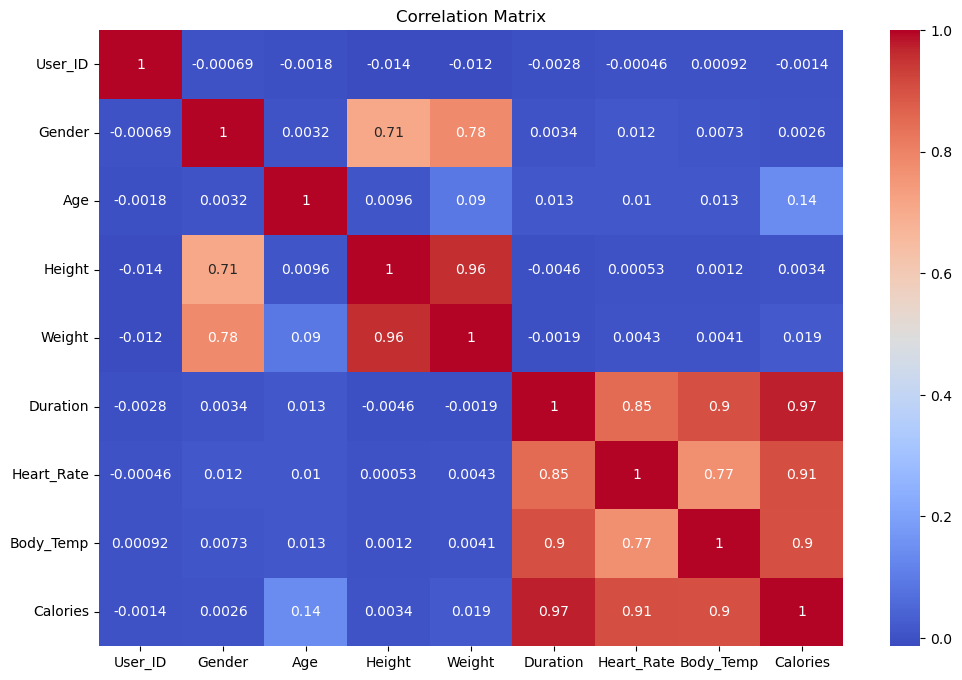

In [47]:
# Correlation Analysis (after encoding)
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [106]:
# Variance Inflation Factor (VIF) to check multicollinearity (after encoding)
X = df.select_dtypes(include=[np.number])
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("\nVariance Inflation Factor:\n", vif_data)


Variance Inflation Factor:
       feature          VIF
0     User_ID    28.161146
1      Gender     5.729799
2         Age    13.964768
3      Height  2143.407843
4      Weight   492.499394
5    Duration   168.162888
6  Heart_Rate   784.679613
7   Body_Temp  1196.072158
8    Calories   389.954615


In [107]:
def calculate_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = df.columns
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df. shape[1])]

  return(vif)

calculate_vif(data[[i for i in df.describe().columns]])

variables          VIF
0     User_ID    28.161146
1      Gender     5.729799
2         Age    13.964768
3      Height  2143.407843
4      Weight   492.499394
5    Duration   168.162888
6  Heart_Rate   784.679613
7   Body_Temp  1196.072158
8    Calories   389.954615

VIF ≈ 1: No multicollinearity. Features are independent of each other.
    
1 < VIF < 5: Low multicollinearity. May not be a significant concern.
    
5 < VIF < 10: Moderate multicollinearity. Consider investigating further.
    
VIF > 10: High multicollinearity. Features are highly correlated, which can lead to issues in regression analysis.

##  Outlier Detection

In [108]:
# Outlier Detection using IQR (after encoding)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df  < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

User_ID         0
Gender          0
Age             0
Height         14
Weight          6
Duration        0
Heart_Rate      1
Body_Temp     369
Calories        0
dtype: int64

In [109]:
features_to_calculate_iqr = ['Height', 'Weight', 'Heart_Rate', 'Body_Temp']

# Calculate and print IQR for specified features
for feature in features_to_calculate_iqr:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    print(f'IQR for {feature}: {iqr}')


IQR for Height: 21.0
IQR for Weight: 24.0
IQR for Heart_Rate: 15.0
IQR for Body_Temp: 1.0


## Handling Outliers 

In [110]:
# Handling Outliers (Example: Replacing with mean)
for feature in df.select_dtypes(include=[np.number]).columns:
  mean_value = df[feature].mean()
  df[feature] = np.where(df[feature] > (Q3[feature] + 1.5 * IQR[feature]), mean_value, df[feature])
  df[feature] = np.where(df[feature] < (Q1[feature] - 1.5 * IQR[feature]), mean_value, df[feature])

In [111]:
# Defining lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
    
# Replacing outliers with the median of the feature
df[feature] = df[feature].apply(lambda x: df[feature].median() if x < lower_bound or x > upper_bound else x)
df

# Now, outliers in specified features have been replaced with the median

User_ID  Gender   Age  Height  Weight  Duration  Heart_Rate  \
0      14733363.0     1.0  68.0   190.0    94.0      29.0       105.0   
1      14861698.0     0.0  20.0   166.0    60.0      14.0        94.0   
2      11179863.0     1.0  69.0   179.0    79.0       5.0        88.0   
3      16180408.0     0.0  34.0   179.0    71.0      13.0       100.0   
4      17771927.0     0.0  27.0   154.0    58.0      10.0        81.0   
...           ...     ...   ...     ...     ...       ...         ...   
14995  15644082.0     0.0  20.0   193.0    86.0      11.0        92.0   
14996  17212577.0     0.0  27.0   165.0    65.0       6.0        85.0   
14997  17271188.0     0.0  43.0   159.0    58.0      16.0        90.0   
14998  18643037.0     1.0  78.0   193.0    97.0       2.0        84.0   
14999  11751526.0     1.0  63.0   173.0    79.0      18.0        92.0   

       Body_Temp   Calories  
0           40.8  13.543515  
1           40.3  13.543515  
2           38.7  13.543515  
3           40.5  13.543515  
4           39.8  13.543515  
...          ...        ...  
14995       40.4  13.543515  
14996       39.2  13.543515  
14997       40.1  13.543515  
14998       38.3  13.543515  
14999       40.5  13.543515  

[15000 rows x 9 columns]

## Univariate and Multivariate Analysis

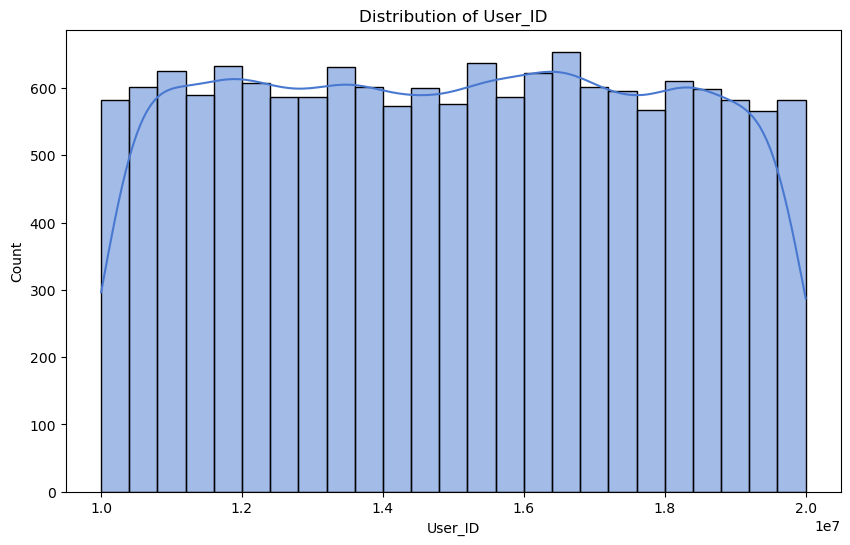

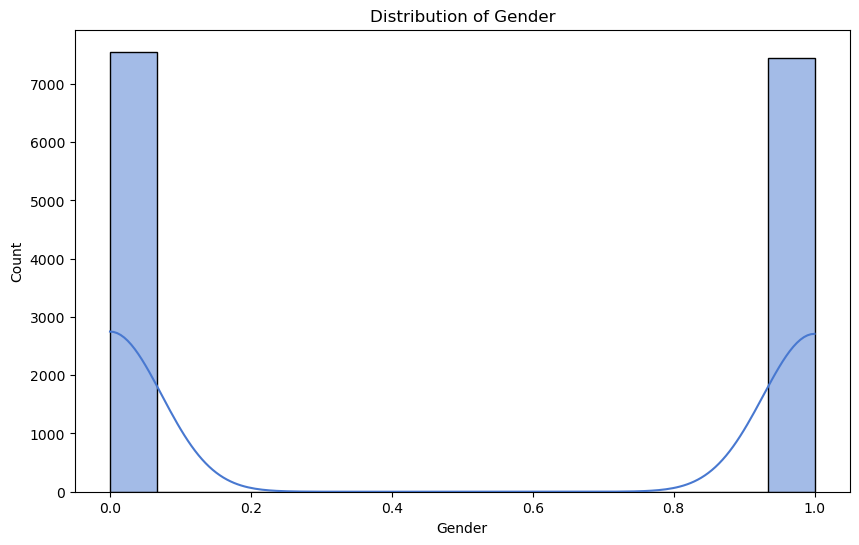

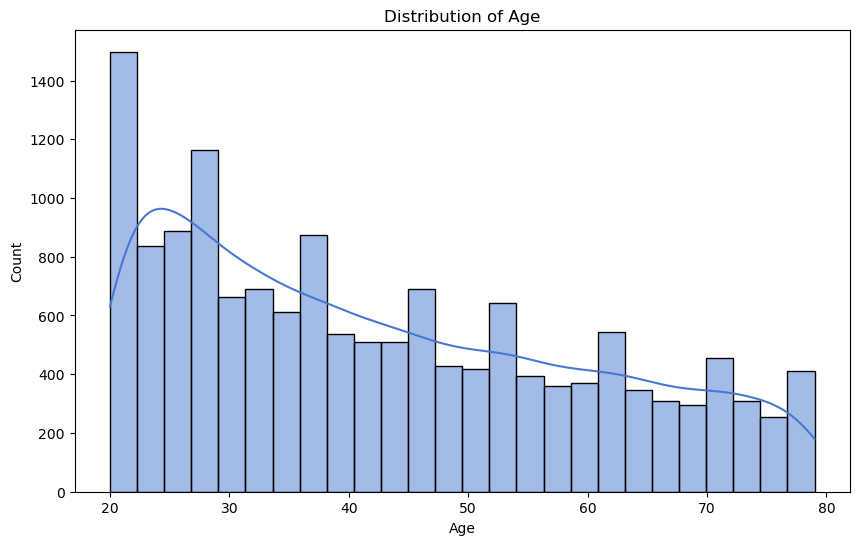

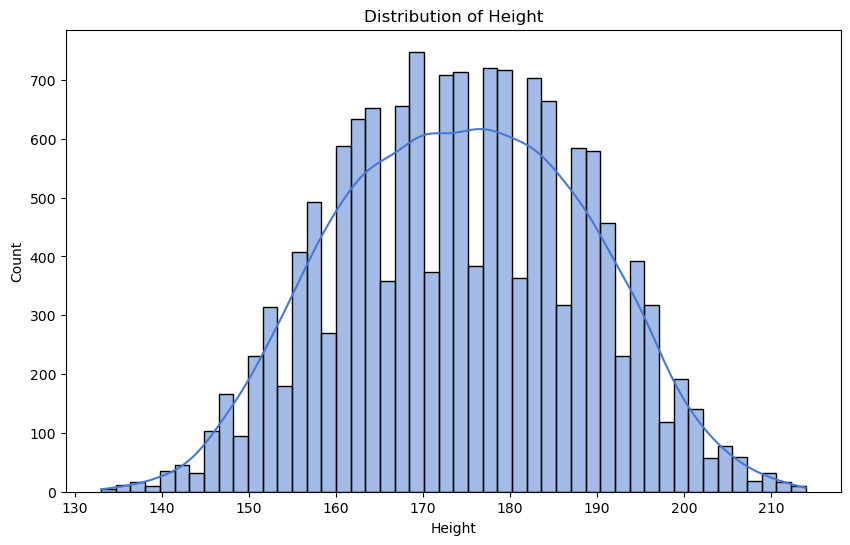

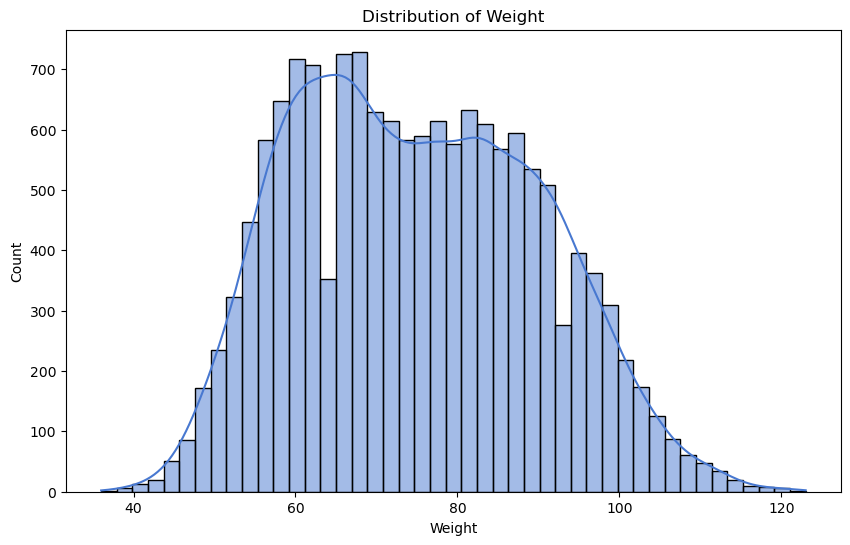

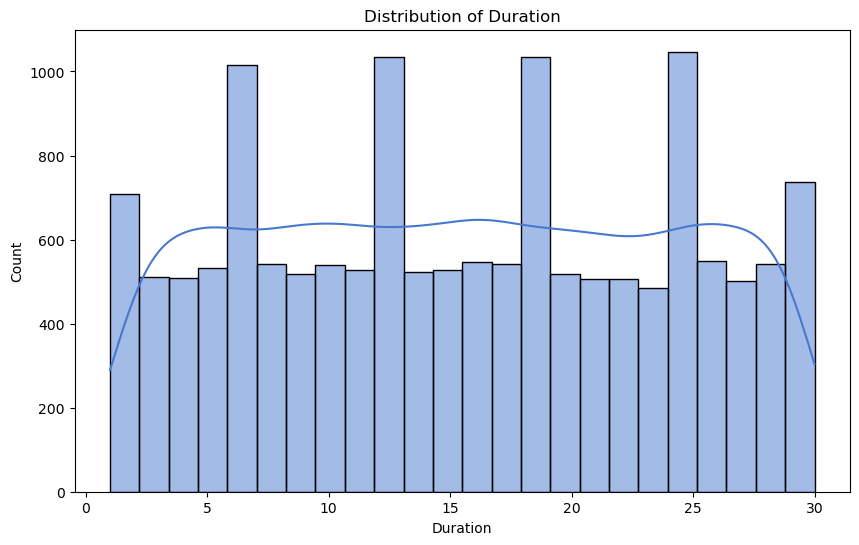

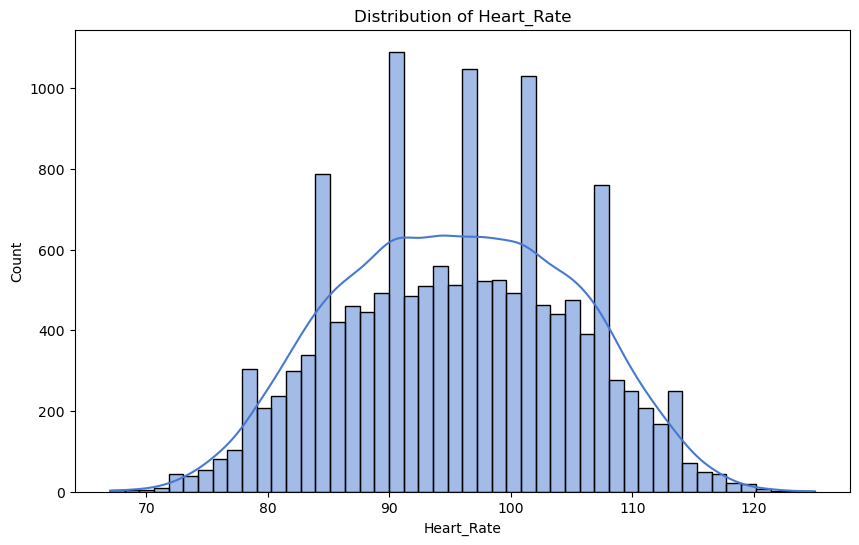

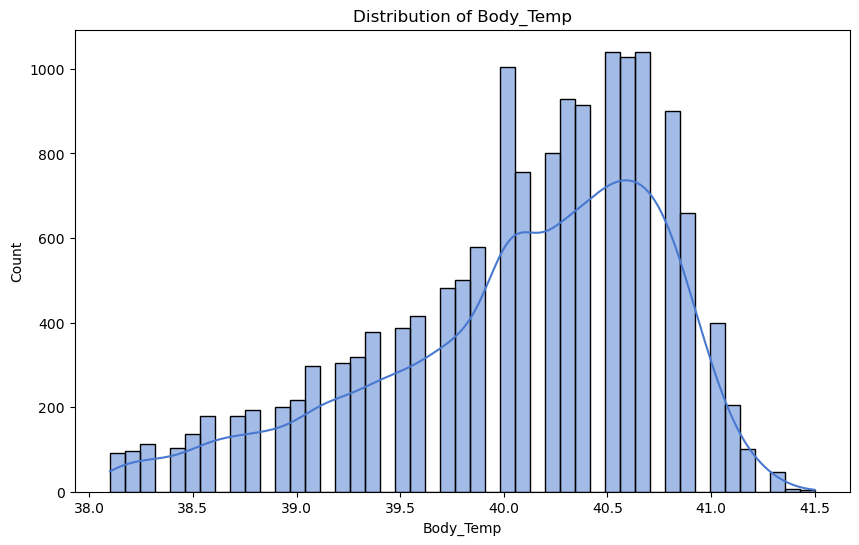

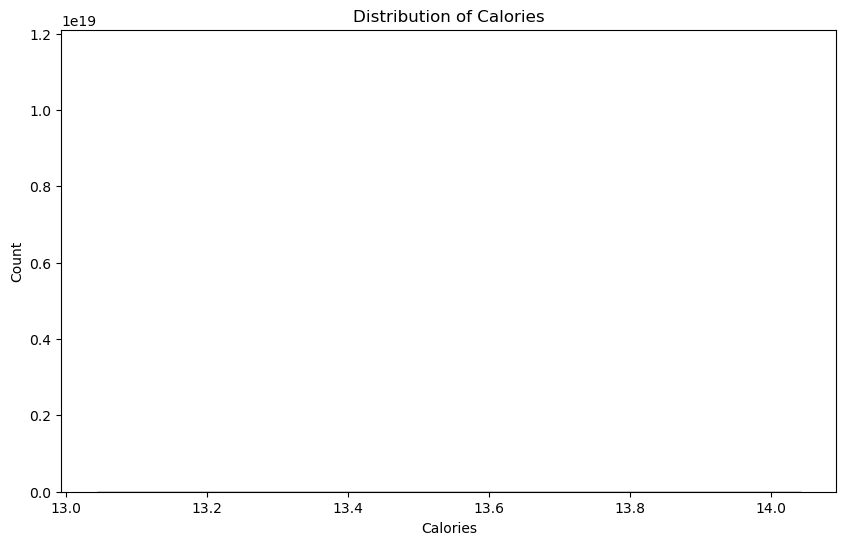

In [112]:
# Univariate Analysis
for column in df.select_dtypes(include=[np.number]).columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.show()

### Univariate Analysis

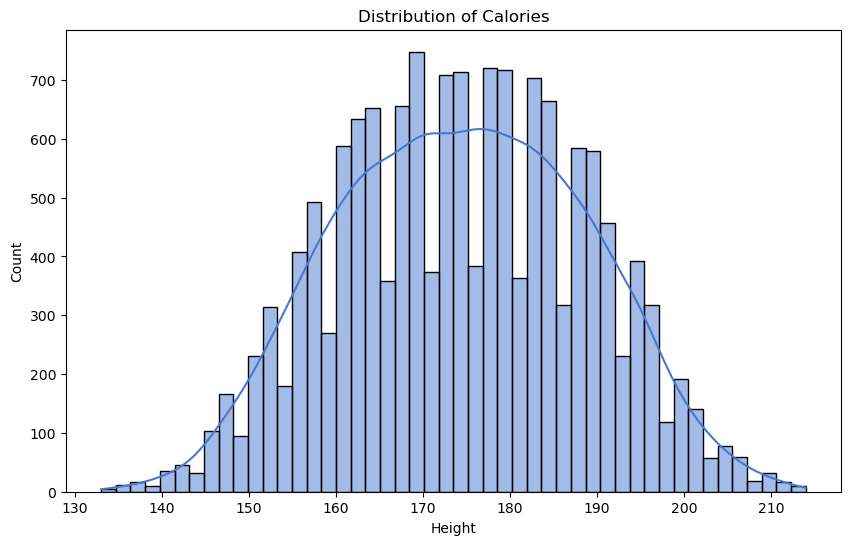

In [113]:
## Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Height'], kde=True)
plt.title(f'Distribution of {column}')
plt.show()

### Bivariate Analysis

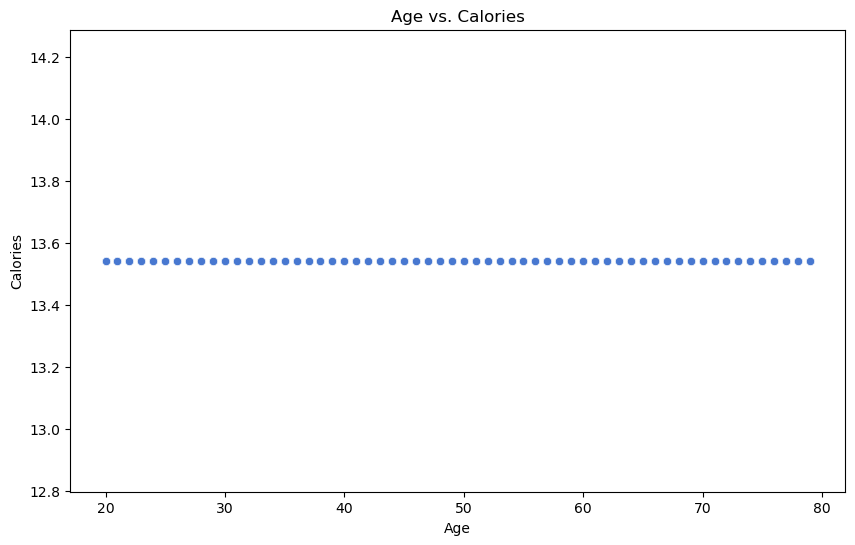

In [114]:
# Scatter plot for Age vs. Calories
plt.figure(figsize=(10, 6))
sns.set_palette('muted')
sns.scatterplot(x='Age', y='Calories', data=df,)
plt.title('Age vs. Calories')
plt.show()


### Multivariate Analysis

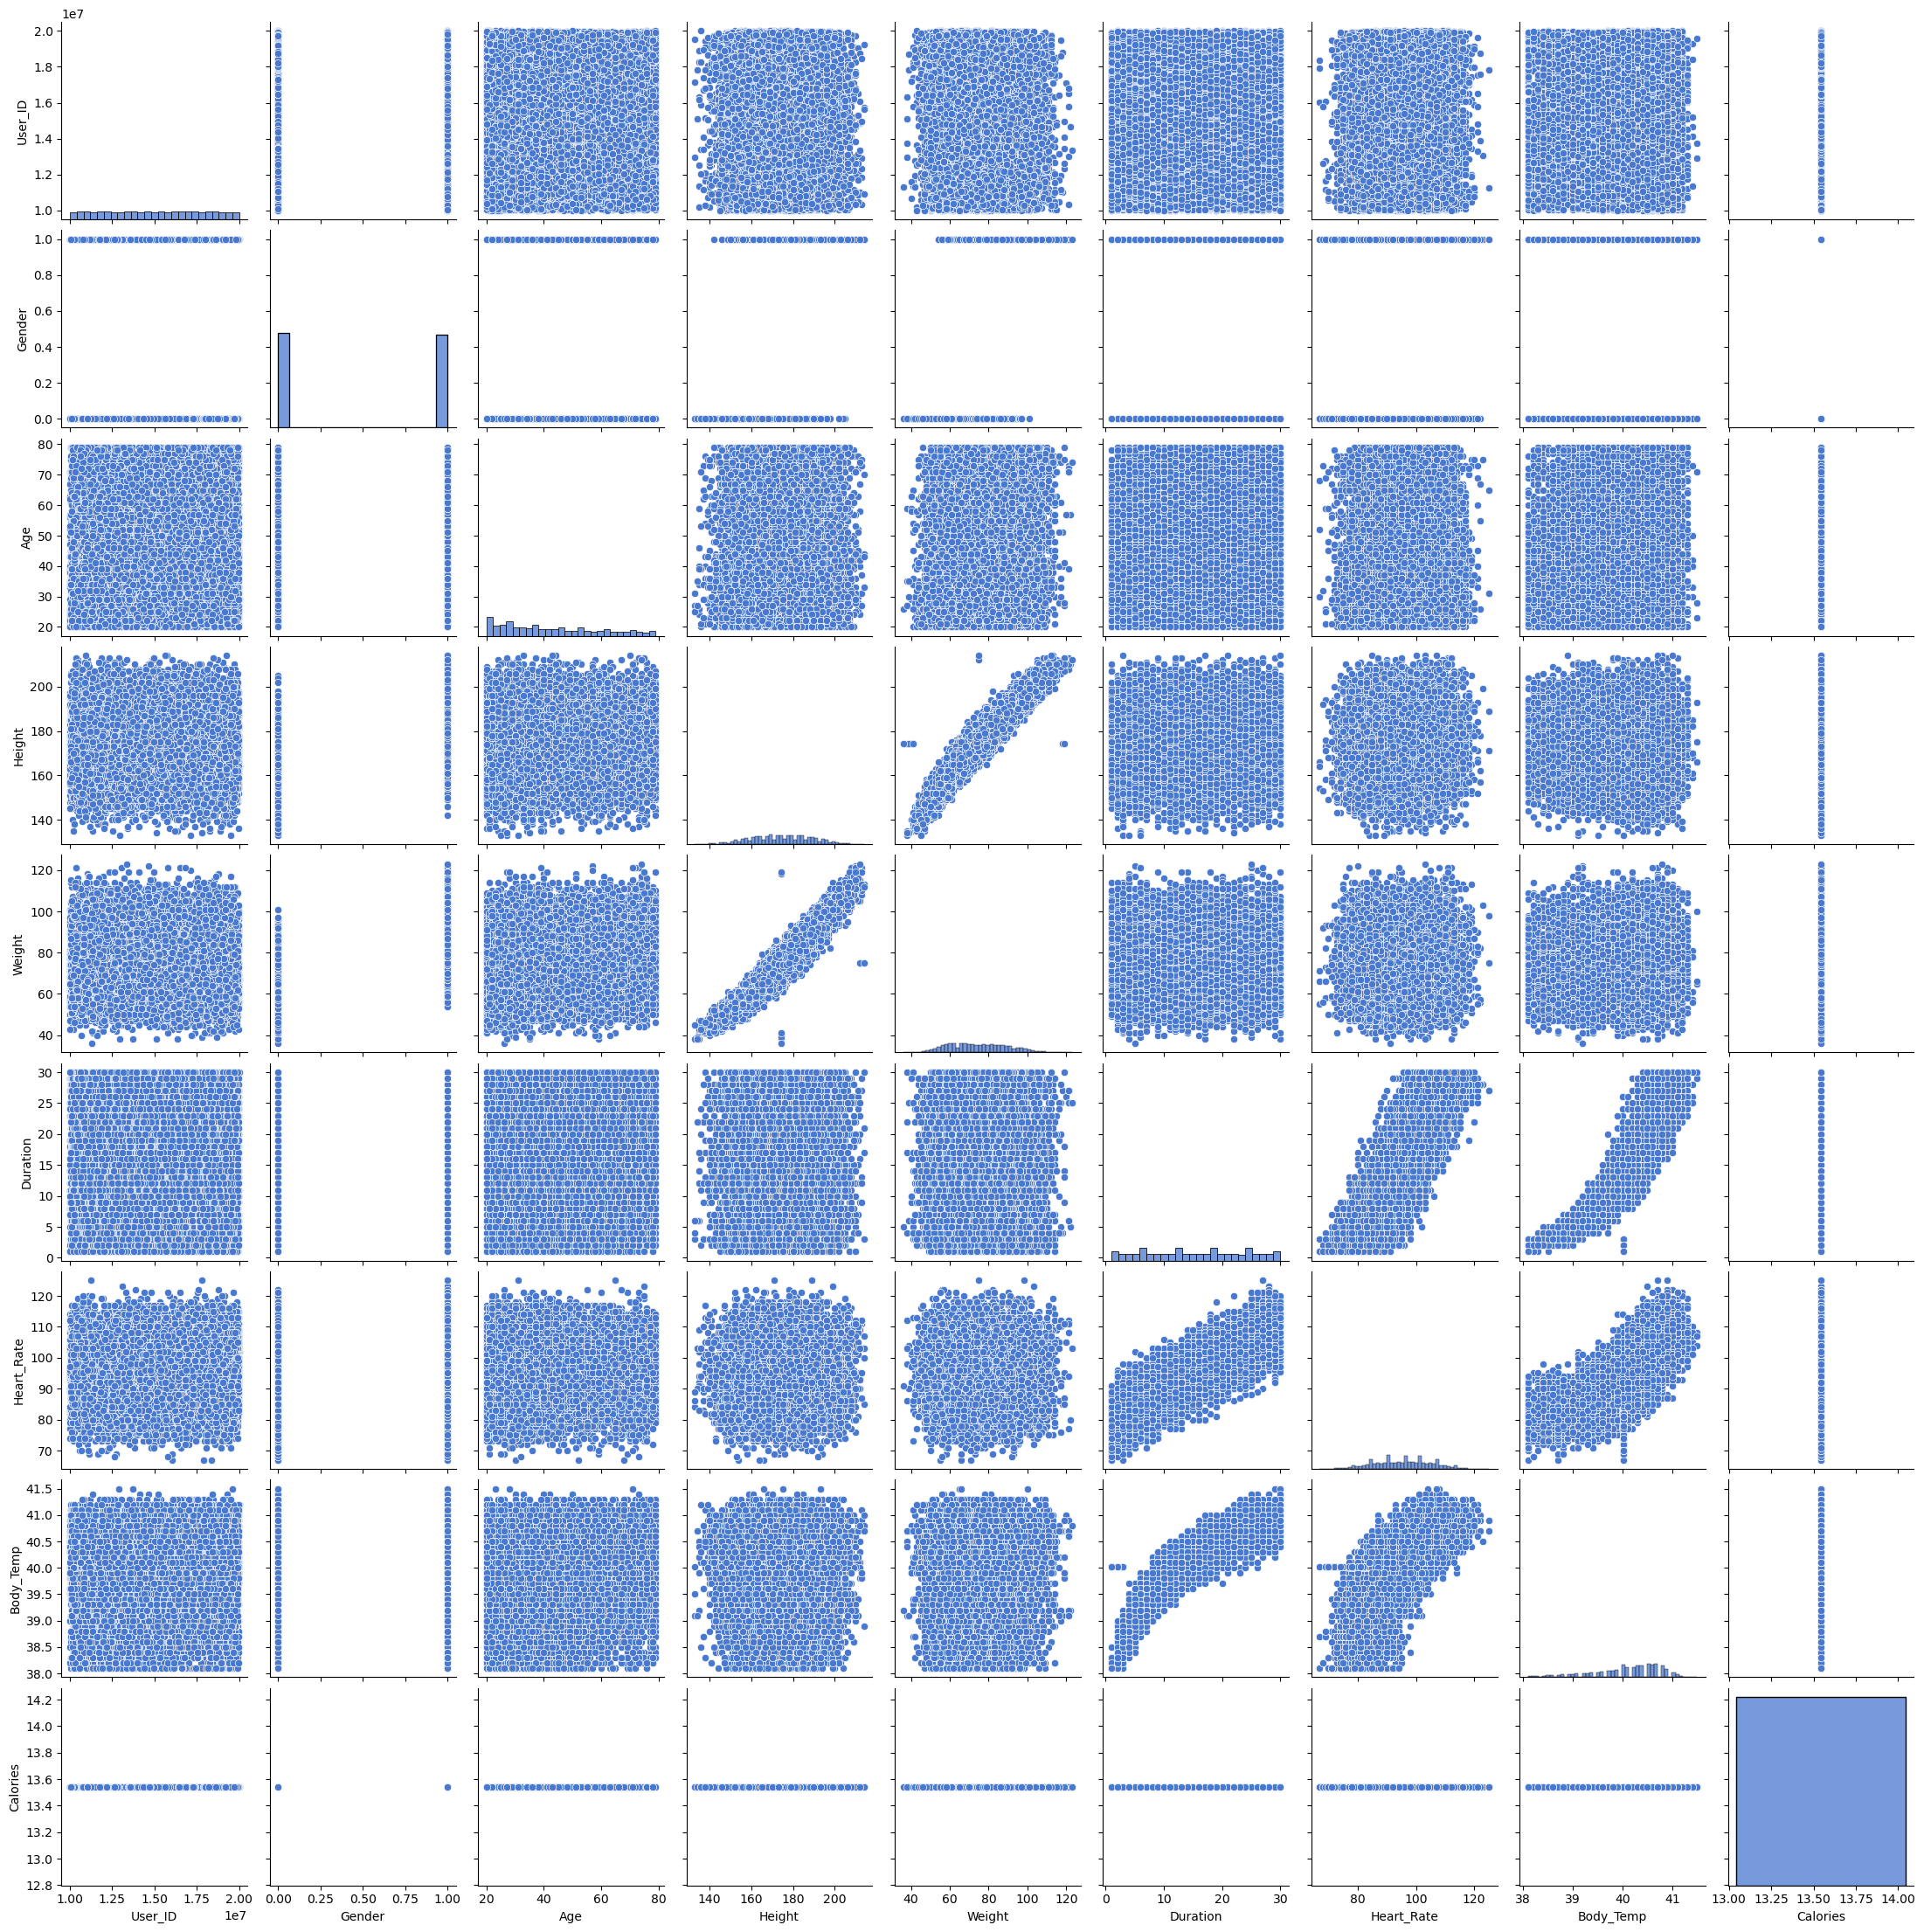

In [115]:
# Multivariate Analysis
sns.pairplot(df)
plt.show()

### Imbalance of Data

In [117]:
# Imbalance of Data
target_counts = df['Calories'].value_counts()
print("\nTarget Variable Distribution:\n", target_counts)


Target Variable Distribution:
 Calories
13.543515    15000
Name: count, dtype: int64


In [119]:
class_counts = data['Calories'].value_counts()
print("Class Distribution:")
(class_counts)

# To print percentages:
class_percentages = data['Calories'].value_counts(normalize=True) * 100
print("Class Distribution (%):")
(class_percentages)


Class Distribution:
Class Distribution (%):


Calories
3.125659     1.073333
4.854460     0.946667
4.602652     0.913333
4.339102     0.913333
5.768331     0.906667
               ...   
25.856548    0.006667
27.132606    0.006667
26.228177    0.006667
27.746256    0.006667
26.548623    0.006667
Name: proportion, Length: 277, dtype: float64

### Variance and Covariance

In [120]:
# Variance and Covariance
df.var()
df.cov()

User_ID        Gender           Age        Height  \
User_ID     8.253275e+12 -9.864412e+02 -8.913662e+04 -5.621595e+05   
Gender     -9.864412e+02  2.500042e-01  2.735912e-02  5.044705e+00   
Age        -8.913662e+04  2.735912e-02  2.883294e+02  2.410207e+00   
Height     -5.621595e+05  5.044705e+00  2.410207e+00  2.014324e+02   
Weight     -4.661823e+05  5.877495e+00  2.303878e+01  2.034881e+02   
Duration   -6.575644e+04  1.430907e-02  1.871257e+00 -4.638062e-01   
Heart_Rate -6.378342e+03  5.427874e-02  1.729009e+00  1.901342e-01   
Body_Temp   2.844224e+01  2.587288e-03  9.223497e-02  1.969068e-02   
Calories   -6.921426e-24 -1.834487e-31  1.758415e-29  1.420465e-30   

                  Weight      Duration    Heart_Rate     Body_Temp  \
User_ID    -4.661823e+05 -6.575644e+04 -6.378342e+03  2.844224e+01   
Gender      5.877495e+00  1.430907e-02  5.427874e-02  2.587288e-03   
Age         2.303878e+01  1.871257e+00  1.729009e+00  9.223497e-02   
Height      2.034881e+02 -4.638062e-01  1.901342e-01  1.969068e-02   
Weight      2.249983e+02 -1.562840e-01  6.694960e-01  3.849909e-02   
Duration   -1.562840e-01  6.920914e+01  6.796420e+01  5.077017e+00   
Heart_Rate  6.694960e-01  6.796420e+01  9.176983e+01  4.993360e+00   
Body_Temp   3.849909e-02  5.077017e+00  4.993360e+00  4.797266e-01   
Calories    2.470667e-29 -1.231294e-29 -2.896133e-29  6.546930e-31   

                Calories  
User_ID    -6.921426e-24  
Gender     -1.834487e-31  
Age         1.758415e-29  
Height      1.420465e-30  
Weight      2.470667e-29  
Duration   -1.231294e-29  
Heart_Rate -2.896133e-29  
Body_Temp   6.546930e-31  
Calories    1.262262e-29

### Feature Selection

In [121]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [122]:
# Feature Importance using SelectKBest
X = df.drop('Calories', axis=1)  # Drop the target column from the features
y = df['Calories']  # Assign the target variable

best_features = SelectKBest(score_func=f_regression, k='all').fit(X, y)
# Fit the SelectKBest model with features (X) and target variable (y)
# k='all' selects all features and returns their scores

("\nFeature Scores:\n", best_features.scores_)
# Print the scores for each feature


('\nFeature Scores:\n',
 array([ -15570.84772343, 1053680.245283  ,  -17801.0055173 ,
         -15097.90055628,  -15623.80348517,  -21032.64931544,
         -15150.38387998,  -15002.47981484]))

In [123]:
# Feature Importance using SelectKBest
X = df.drop('Calories', axis=1)  # Drop the target column from the features
y = df['Calories']  # Assign the target variable

# Feature scaling (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

best_features = SelectKBest(score_func=f_regression, k='all').fit(X_scaled, y)
# Fit the SelectKBest model with scaled features (X_scaled) and target variable (y)
# k='all' selects all features and returns their scores

feature_names = list(X.columns)  # Get the feature names

# Print feature names and scores in a more readable format
print("\nFeature Scores:")
for feature, score in zip(feature_names, best_features.scores_):
  print(f"{feature}: {score:.2f}")  # Format score to 2 decimal places



Feature Scores:
User_ID: 0.00
Gender: 0.00
Age: 0.00
Height: 0.00
Weight: 0.00
Duration: 0.00
Heart_Rate: 0.00
Body_Temp: 0.00


In [124]:
# Feature Importance using SelectKBest
X = df.drop('Calories', axis=1)  # Drop the target column from the features
y = df['Calories']  # Assign the target variable

best_features = SelectKBest(score_func=f_regression, k='all').fit(X, y)
# Fit the SelectKBest model with features (X) and target variable (y)
# k='all' selects all features and returns their scores

feature_names = list(X.columns)  # Get the feature names

# Print feature names and scores in a simpler format
print("\nFeature Scores:")
for feature, score in zip(feature_names, best_features.scores_):
  print(feature, score)  # Print feature name and score directly



Feature Scores:
User_ID -15570.84772343196
Gender 1053680.2452829974
Age -17801.005517303856
Height -15097.900556281325
Weight -15623.803485168
Duration -21032.649315443145
Heart_Rate -15150.38387998317
Body_Temp -15002.479814840208


In [126]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

##  Algorithms

###  Splitting of daa into train test split

In [127]:
# Selecting features and target variable
features = df[['Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp']]
target = df['Calories']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


##  Linear Regression

In [136]:
# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model to the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = linear_reg_model.predict(X_test)

# Calculate Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# You can also print coefficients and intercept if needed
print("Coefficients:", linear_reg_model.coef_)
print("Intercept:", linear_reg_model.intercept_)


Mean Squared Error: 1.262177448353619e-29
Coefficients: [ 4.77346201e-30  2.15143662e-31  2.54409767e-30 -2.42538024e-30
 -1.14694947e-29 -2.36381844e-30  1.88454483e-28]
Intercept: 13.543514784943557


In [137]:
train_score = linear_reg_model.score(X_train, y_train) * 100
print(f'The train data accuracy is {train_score}')

test_score = linear_reg_model.score(X_test, y_test)*100
print(f'The test data accuracy is {test_score}')

The train data accuracy is 0.0
The test data accuracy is -300.0


In [138]:
# Evaluation metrics.
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [140]:
r2

-3.0

## Ridge Regression

In [129]:
# Initialize Ridge Regression model
alpha = 1.0
ridge_model = Ridge(alpha=alpha)

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions for train and test datasets
train_predictions = ridge_model.predict(X_train)
test_predictions = ridge_model.predict(X_test)

# Calculate metrics for train dataset
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

# Calculate metrics for test dataset
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(train_mse)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print("\nRidge Regression Test Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")



Ridge Regression Test Metrics:
Mean Squared Error (MSE): 1.262177448353619e-29
Root Mean Squared Error (RMSE): 3.552713678800501e-15
Mean Absolute Error (MAE): 3.552713678800501e-15
R-squared (R2): -3.0


In [130]:
train_score = ridge_model.score(X_train, y_train) * 100
print(f'The train data accuracy is {train_score}')

test_score = ridge_model.score(X_test, y_test)*100
print(f'The test data accuracy is {test_score}')

The train data accuracy is 0.0
The test data accuracy is -300.0


###  Lasso Regression

In [135]:
# Initialize Lasso Regression model
alpha = 1.0
lasso_model = Lasso(alpha=alpha)

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions for train and test datasets
train_predictions = lasso_model.predict(X_train)
test_predictions = lasso_model.predict(X_test)

# Calculate metrics for train dataset
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

# Calculate metrics for test dataset
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

# Print performance metrics
print("\nLasso Regression Test Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")



Lasso Regression Test Metrics:
Mean Squared Error (MSE): 1.262177448353619e-29
Root Mean Squared Error (RMSE): 3.552713678800501e-15
Mean Absolute Error (MAE): 3.552713678800501e-15
R-squared (R2): -3.0


In [134]:
test_score = lasso_model.score(X_test, y_test)*100
print(f'The test data accuracy is {test_score}')
train_score = lasso_model.score(X_train, y_train) * 100
print(f'The train data accuracy is {train_score}')


The test data accuracy is -300.0
The train data accuracy is 0.0


##  Decision Tree Regressor

In [142]:
# Initialize Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
predictions = decision_tree_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print metrics
print("Decision Tree Regressor Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


Decision Tree Regressor Metrics:
MSE: 9.30252862884843e-24
RMSE: 3.05000469325023e-12
MAE: 3.05000469325023e-12
R-squared: -2948088.0


In [143]:
# Initialize Decision Tree model with post-pruning (limiting the depth)
max_depth = 10  # You can adjust this value based on your preference
decision_tree_model = DecisionTreeRegressor(random_state=42, max_depth=max_depth)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
predictions = decision_tree_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print metrics
print("Decision Tree Regressor Metrics (with post-pruning):")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


Decision Tree Regressor Metrics (with post-pruning):
MSE: 9.30252862884843e-24
RMSE: 3.05000469325023e-12
MAE: 3.05000469325023e-12
R-squared: -2948088.0


In [144]:
train_score = decision_tree_model.score(X_train, y_train) * 100
print(f'The train data accuracy is {train_score}')

test_score = linear_reg_model.score(X_test, y_test)*100
print(f'The test data accuracy is {test_score}')


The train data accuracy is -73702125.0
The test data accuracy is -300.0


## RANDOM FOREST REGRESSOR

In [145]:
# Initialize Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
predictions = random_forest_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print metrics
print("Random Forest Regressor Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

Random Forest Regressor Metrics:
MSE: 1.3208970986946501e-24
RMSE: 1.149302875091962e-12
MAE: 1.149302875091962e-12
R-squared: -418608.0


In [146]:
train_score = random_forest_model.score(X_train, y_train) * 100
print(f'The train data accuracy is {train_score}')

test_score =random_forest_model.score(X_test, y_test)*100
print(f'The test data accuracy is {test_score}')


The train data accuracy is -10465125.0
The test data accuracy is -41860800.0


##  Support Vector Regressor

In [156]:
# Initialize SVR model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions
predictions = svr_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print metrics
print("SVR Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

SVR Metrics:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R-squared: 1.0


In [157]:
train_score = svr_model.score(X_train, y_train) * 100
print(f'The train data accuracy is {train_score}')

test_score = svr_model.score(X_test, y_test)*100
print(f'The test data accuracy is {test_score}')

The train data accuracy is 100.0
The test data accuracy is 100.0


## Gradient Boosting Regressor

In [153]:
# Selecting features and target variable
features = df[['Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp']]
target = df['Calories']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gradient_boosting_model.fit(X_train, y_train)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print metrics
print("Gradient Boosting Regressor Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

Gradient Boosting Regressor Metrics:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R-squared: 1.0


In [155]:
train_score = gradient_boosting_model.score(X_train, y_train) * 100
print(f'The train data accuracy is {train_score}')

test_score = gradient_boosting_model.score(X_test, y_test)*100
print(f'The test data accuracy is {test_score}')

The train data accuracy is 0.0
The test data accuracy is -300.0


## Classification

In [178]:
test=pd.read_csv(r"C:\Users\ARPITA\Downloads\ML_Algorithms\test.csv")
test

id  Marital status  Application mode  Application order  Course  \
0       76518               1                 1                  1    9500   
1       76519               1                 1                  1    9238   
2       76520               1                 1                  1    9238   
3       76521               1                44                  1    9147   
4       76522               1                39                  1    9670   
...       ...             ...               ...                ...     ...   
51007  127525               1                 1                  2     171   
51008  127526               2                39                  1    9119   
51009  127527               1                 1                  1     171   
51010  127528               1                 1                  3    9773   
51011  127529               1                 1                  1     171   

       Daytime/evening attendance  Previous qualification  \
0                               1                       1   
1                               1                       1   
2                               1                       1   
3                               1                      39   
4                               1                       1   
...                           ...                     ...   
51007                           1                       1   
51008                           1                      19   
51009                           1                       1   
51010                           1                       1   
51011                           1                       1   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
0                               141.0            1                       3   
1                               128.0            1                       1   
2                               118.0            1                       1   
3                               130.0            1                       1   
4                               110.0            1                       1   
...                               ...          ...                     ...   
51007                           128.0            1                      38   
51008                           133.1            1                      19   
51009                           127.0            1                       1   
51010                           132.0            1                      19   
51011                           129.0            1                      37   

       ...  Curricular units 1st sem (without evaluations)  \
0      ...                                               0   
1      ...                                               0   
2      ...                                               0   
3      ...                                               0   
4      ...                                               0   
...    ...                                             ...   
51007  ...                                               0   
51008  ...                                               0   
51009  ...                                               0   
51010  ...                                               0   
51011  ...                                               0   

       Curricular units 2nd sem (credited)  \
0                                        0   
1                                        0   
2                                        0   
3                                        3   
4                                        0   
...                                    ...   
51007                                    0   
51008                                    0   
51009                                    0   
51010                                    0   
51011                                    0   

       Curricular units 2nd sem (enrolled)  \
0                                        8   
1             

In [179]:
data=pd.read_csv(r"C:\Users\ARPITA\Downloads\ML_Algorithms\sample_submission.csv")
data

id    Target
0       76518  Graduate
1       76519  Graduate
2       76520  Graduate
3       76521  Graduate
4       76522  Graduate
...       ...       ...
51007  127525  Graduate
51008  127526  Graduate
51009  127527  Graduate
51010  127528  Graduate
51011  127529  Graduate

[51012 rows x 2 columns]

In [180]:
test = pd.merge(data, test, on='id', how='left')
test

id    Target  Marital status  Application mode  Application order  \
0       76518  Graduate               1                 1                  1   
1       76519  Graduate               1                 1                  1   
2       76520  Graduate               1                 1                  1   
3       76521  Graduate               1                44                  1   
4       76522  Graduate               1                39                  1   
...       ...       ...             ...               ...                ...   
51007  127525  Graduate               1                 1                  2   
51008  127526  Graduate               2                39                  1   
51009  127527  Graduate               1                 1                  1   
51010  127528  Graduate               1                 1                  3   
51011  127529  Graduate               1                 1                  1   

       Course  Daytime/evening attendance  Previous qualification  \
0        9500                           1                       1   
1        9238                           1                       1   
2        9238                           1                       1   
3        9147                           1                      39   
4        9670                           1                       1   
...       ...                         ...                     ...   
51007     171                           1                       1   
51008    9119                           1                      19   
51009     171                           1                       1   
51010    9773                           1                       1   
51011     171                           1                       1   

       Previous qualification (grade)  Nacionality  ...  \
0                               141.0            1  ...   
1                               128.0            1  ...   
2                               118.0            1  ...   
3                               130.0            1  ...   
4                               110.0            1  ...   
...                               ...          ...  ...   
51007                           128.0            1  ...   
51008                           133.1            1  ...   
51009                           127.0            1  ...   
51010                           132.0            1  ...   
51011                           129.0            1  ...   

       Curricular units 1st sem (without evaluations)  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
51007                                               0   
51008                                               0   
51009                                               0   
51010                                               0   
51011                                               0   

       Curricular units 2nd sem (credited)  \
0                                        0   
1                                        0   
2                                        0   
3                                        3   
4                                        0   
...                                    ...   
51007                                    0   
51008                                    0   
51009                                    0   
51010                                    0   
51011                                    0   

       Curricular units 2nd sem (enrolled)  \
0                                        8   
1                                        6   
2                                        6   
3                                        8   
4                                        6  

In [181]:
train=pd.read_csv(r"C:\Users\ARPITA\Downloads\ML_Algorithms\train.csv")
train

id  Marital status  Application mode  Application order  Course  \
0          0               1                 1                  1    9238   
1          1               1                17                  1    9238   
2          2               1                17                  2    9254   
3          3               1                 1                  3    9500   
4          4               1                 1                  2    9500   
...      ...             ...               ...                ...     ...   
76513  76513               1                17                  1    9254   
76514  76514               1                 1                  6    9254   
76515  76515               5                17                  1    9085   
76516  76516               1                 1                  3    9070   
76517  76517               1                 1                  1    9773   

       Daytime/evening attendance  Previous qualification  \
0                               1                       1   
1                               1                       1   
2                               1                       1   
3                               1                       1   
4                               1                       1   
...                           ...                     ...   
76513                           1                       1   
76514                           1                       1   
76515                           1                       1   
76516                           1                       1   
76517                           1                       1   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
0                               126.0            1                       1   
1                               125.0            1                      19   
2                               137.0            1                       3   
3                               131.0            1                      19   
4                               132.0            1                      19   
...                               ...          ...                     ...   
76513                           121.0            1                      19   
76514                           125.0            1                       1   
76515                           138.0            1                      37   
76516                           136.0            1                      38   
76517                           133.1            1                      19   

       ...  Curricular units 2nd sem (credited)  \
0      ...                                    0   
1      ...                                    0   
2      ...                                    0   
3      ...                                    0   
4      ...                                    0   
...    ...                                  ...   
76513  ...                                    0   
76514  ...                                    0   
76515  ...                                    0   
76516  ...                                    0   
76517  ...                                    0   

       Curricular units 2nd sem (enrolled)  \
0                                        6   
1                                        6   
2                                        6   
3                                        8   
4                                        7   
...                                    ...   
76513                                    6   
76514                                    6   
76515                                    5   
76516                                    6   
76517                                    6   

       Curricular units 2nd sem (evaluations)  \
0                                           7   
1                                           9   
2                                           0   
3                                          11   
4   

In [182]:
data=pd.concat([test,train],axis=0)
data

id    Target  Marital status  Application mode  Application order  \
0      76518  Graduate               1                 1                  1   
1      76519  Graduate               1                 1                  1   
2      76520  Graduate               1                 1                  1   
3      76521  Graduate               1                44                  1   
4      76522  Graduate               1                39                  1   
...      ...       ...             ...               ...                ...   
76513  76513  Graduate               1                17                  1   
76514  76514  Graduate               1                 1                  6   
76515  76515  Enrolled               5                17                  1   
76516  76516   Dropout               1                 1                  3   
76517  76517  Graduate               1                 1                  1   

       Course  Daytime/evening attendance  Previous qualification  \
0        9500                           1                       1   
1        9238                           1                       1   
2        9238                           1                       1   
3        9147                           1                      39   
4        9670                           1                       1   
...       ...                         ...                     ...   
76513    9254                           1                       1   
76514    9254                           1                       1   
76515    9085                           1                       1   
76516    9070                           1                       1   
76517    9773                           1                       1   

       Previous qualification (grade)  Nacionality  ...  \
0                               141.0            1  ...   
1                               128.0            1  ...   
2                               118.0            1  ...   
3                               130.0            1  ...   
4                               110.0            1  ...   
...                               ...          ...  ...   
76513                           121.0            1  ...   
76514                           125.0            1  ...   
76515                           138.0            1  ...   
76516                           136.0            1  ...   
76517                           133.1            1  ...   

       Curricular units 1st sem (without evaluations)  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
76513                                               0   
76514                                               0   
76515                                               2   
76516                                               0   
76517                                               0   

       Curricular units 2nd sem (credited)  \
0                                        0   
1                                        0   
2                                        0   
3                                        3   
4                                        0   
...                                    ...   
76513                                    0   
76514                                    0   
76515                                    0   
76516                                    0   
76517                                    0   

       Curricular units 2nd sem (enrolled)  \
0                                        8   
1                                        6   
2                                        6   
3                                        8   
4                                        6   
...      

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127530 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   id                                              127530 non-null  int64  
 1   Target                                          127530 non-null  object 
 2   Marital status                                  127530 non-null  int64  
 3   Application mode                                127530 non-null  int64  
 4   Application order                               127530 non-null  int64  
 5   Course                                          127530 non-null  int64  
 6   Daytime/evening attendance                      127530 non-null  int64  
 7   Previous qualification                          127530 non-null  int64  
 8   Previous qualification (grade)                  127530 non-null  float64
 9   Nacionality                     

In [185]:
data.head()

id    Target  Marital status  Application mode  Application order  \
0  76518  Graduate               1                 1                  1   
1  76519  Graduate               1                 1                  1   
2  76520  Graduate               1                 1                  1   
3  76521  Graduate               1                44                  1   
4  76522  Graduate               1                39                  1   

   Course  Daytime/evening attendance  Previous qualification  \
0    9500                           1                       1   
1    9238                           1                       1   
2    9238                           1                       1   
3    9147                           1                      39   
4    9670                           1                       1   

   Previous qualification (grade)  Nacionality  ...  \
0                           141.0            1  ...   
1                           128.0            1  ...   
2                           118.0            1  ...   
3                           130.0            1  ...   
4                           110.0            1  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    8   
1                                    0                                    6   
2                                    0                                    6   
3                                    3                                    8   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                      11   
3                                      14   
4                                       9   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.500000   
2                                    5                         11.000000   
3                                    5                         11.000000   
4                                    4                         10.666667   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               13.9   
1                                               0               11.1   
2                                               0               15.5   
3                                               0                8.9   
4                                               2                7.6   

   Inflation rate   GDP  
0            -0.3  0.79  
1             0.6  2.02  
2             2.8 -4.06  
3             1.4  3.51  
4             2.6  0.32  

[5 rows x 38 columns]

In [186]:
data.tail()

id    Target  Marital status  Application mode  Application order  \
76513  76513  Graduate               1                17                  1   
76514  76514  Graduate               1                 1                  6   
76515  76515  Enrolled               5                17                  1   
76516  76516   Dropout               1                 1                  3   
76517  76517  Graduate               1                 1                  1   

       Course  Daytime/evening attendance  Previous qualification  \
76513    9254                           1                       1   
76514    9254                           1                       1   
76515    9085                           1                       1   
76516    9070                           1                       1   
76517    9773                           1                       1   

       Previous qualification (grade)  Nacionality  ...  \
76513                           121.0            1  ...   
76514                           125.0            1  ...   
76515                           138.0            1  ...   
76516                           136.0            1  ...   
76517                           133.1            1  ...   

       Curricular units 1st sem (without evaluations)  \
76513                                               0   
76514                                               0   
76515                                               2   
76516                                               0   
76517                                               0   

       Curricular units 2nd sem (credited)  \
76513                                    0   
76514                                    0   
76515                                    0   
76516                                    0   
76517                                    0   

       Curricular units 2nd sem (enrolled)  \
76513                                    6   
76514                                    6   
76515                                    5   
76516                                    6   
76517                                    6   

       Curricular units 2nd sem (evaluations)  \
76513                                       8   
76514                                       9   
76515                                       8   
76516                                       0   
76517                                       6   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
76513                                    5                         10.600000   
76514                                    6                         13.875000   
76515                                    5                         11.400000   
76516                                    0                          0.000000   
76517                                    6                         13.666667   

       Curricular units 2nd sem (without evaluations)  Unemployment rate  \
76513                                               0               13.9   
76514                                               0                9.4   
76515                                               1                9.4   
76516                                               0                7.6   
76517                                               0               15.5   

       Inflation rate   GDP  
76513            -0.3  0.79  
76514            -0.8 -3.12  
76515            -0.8 -3.12  
76516             2.6  0.32  
76517             2.8 -4.06  

[5 rows x 38 columns]

In [187]:
data.describe()

id  Marital status  Application mode  Application order  \
count  127530.000000   127530.000000     127530.000000      127530.000000   
mean    63764.500000        1.110797         16.059492           1.645911   
std     36814.884252        0.440239         16.671022           1.232054   
min         0.000000        1.000000          1.000000           0.000000   
25%     31882.250000        1.000000          1.000000           1.000000   
50%     63764.500000        1.000000         17.000000           1.000000   
75%     95646.750000        1.000000         39.000000           2.000000   
max    127529.000000        6.000000         53.000000           9.000000   

              Course  Daytime/evening attendance  Previous qualification  \
count  127530.000000               127530.000000           127530.000000   
mean     9011.293649                    0.916514                3.649259   
std      1782.812455                    0.276617                8.605169   
min        33.000000                    0.000000                1.000000   
25%      9119.000000                    1.000000                1.000000   
50%      9254.000000                    1.000000                1.000000   
75%      9670.000000                    1.000000                1.000000   
max      9991.000000                    1.000000               43.000000   

       Previous qualification (grade)    Nacionality  Mother's qualification  \
count                   127530.000000  127530.000000           127530.000000   
mean                       132.358460       1.215996               19.867890   
std                         10.951586       3.341797               15.393189   
min                         95.000000       1.000000                1.000000   
25%                        125.000000       1.000000                1.000000   
50%                        133.100000       1.000000               19.000000   
75%                        140.000000       1.000000               37.000000   
max                        190.000000     109.000000               44.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                   127530.000000   
mean   ...                                        0.057900   
std    ...                                        0.406474   
min    ...                                        0.000000   
25%    ...                                        0.000000   
50%    ...                                        0.000000   
75%    ...                                        0.000000   
max    ...                                       12.000000   

       Curricular units 2nd sem (credited)  \
count                        127530.000000   
mean                              0.133945   
std                               0.911624   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                        127530.000000   
mean                              5.937701   
std                               1.616266   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               6.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                           127530.000000   
mean                                 7.250318   
std                                  3.475293   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                  9.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count  

In [190]:
data.isnull().sum()

id                                                0
Target                                            0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender      

In [191]:
data.duplicated().sum()

0

In [192]:
data.columns

Index(['id', 'Target', 'Marital status', 'Application mode',
       'Application order', 'Course', 'Daytime/evening attendance',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', 'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curric

### Dependent and independent features

In [195]:
# separating the dataset into dependent & independent variable.
     
X=data[['id','Marital status', 'Application mode',
       'Application order', 'Course', 'Daytime/evening attendance',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']]        # Independent variables.
Y=data['Target'] 

In [196]:
X

id  Marital status  Application mode  Application order  Course  \
0      76518               1                 1                  1    9500   
1      76519               1                 1                  1    9238   
2      76520               1                 1                  1    9238   
3      76521               1                44                  1    9147   
4      76522               1                39                  1    9670   
...      ...             ...               ...                ...     ...   
76513  76513               1                17                  1    9254   
76514  76514               1                 1                  6    9254   
76515  76515               5                17                  1    9085   
76516  76516               1                 1                  3    9070   
76517  76517               1                 1                  1    9773   

       Daytime/evening attendance  Previous qualification  \
0                               1                       1   
1                               1                       1   
2                               1                       1   
3                               1                      39   
4                               1                       1   
...                           ...                     ...   
76513                           1                       1   
76514                           1                       1   
76515                           1                       1   
76516                           1                       1   
76517                           1                       1   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
0                               141.0            1                       3   
1                               128.0            1                       1   
2                               118.0            1                       1   
3                               130.0            1                       1   
4                               110.0            1                       1   
...                               ...          ...                     ...   
76513                           121.0            1                      19   
76514                           125.0            1                       1   
76515                           138.0            1                      37   
76516                           136.0            1                      38   
76517                           133.1            1                      19   

       ...  Curricular units 1st sem (without evaluations)  \
0      ...                                               0   
1      ...                                               0   
2      ...                                               0   
3      ...                                               0   
4      ...                                               0   
...    ...                                             ...   
76513  ...                                               0   
76514  ...                                               0   
76515  ...                                               2   
76516  ...                                               0   
76517  ...                                               0   

       Curricular units 2nd sem (credited)  \
0                                        0   
1                                        0   
2                                        0   
3                                        3   
4                                        0   
...                                    ...   
76513                                    0   
76514                                    0   
76515                                    0   
76516                                    0   
76517                                    0   

       Curricular units 2nd sem (enrolled)  \
0                                        8   
1                        

## Label Encoding

In [197]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Gender' column
data['Target'] = label_encoder.fit_transform(data['Target'])

# Now 'male' is encoded as 0 and 'female' is encoded as 1

In [199]:
data

id  Target  Marital status  Application mode  Application order  \
0      76518       2               1                 1                  1   
1      76519       2               1                 1                  1   
2      76520       2               1                 1                  1   
3      76521       2               1                44                  1   
4      76522       2               1                39                  1   
...      ...     ...             ...               ...                ...   
76513  76513       2               1                17                  1   
76514  76514       2               1                 1                  6   
76515  76515       1               5                17                  1   
76516  76516       0               1                 1                  3   
76517  76517       2               1                 1                  1   

       Course  Daytime/evening attendance  Previous qualification  \
0        9500                           1                       1   
1        9238                           1                       1   
2        9238                           1                       1   
3        9147                           1                      39   
4        9670                           1                       1   
...       ...                         ...                     ...   
76513    9254                           1                       1   
76514    9254                           1                       1   
76515    9085                           1                       1   
76516    9070                           1                       1   
76517    9773                           1                       1   

       Previous qualification (grade)  Nacionality  ...  \
0                               141.0            1  ...   
1                               128.0            1  ...   
2                               118.0            1  ...   
3                               130.0            1  ...   
4                               110.0            1  ...   
...                               ...          ...  ...   
76513                           121.0            1  ...   
76514                           125.0            1  ...   
76515                           138.0            1  ...   
76516                           136.0            1  ...   
76517                           133.1            1  ...   

       Curricular units 1st sem (without evaluations)  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
76513                                               0   
76514                                               0   
76515                                               2   
76516                                               0   
76517                                               0   

       Curricular units 2nd sem (credited)  \
0                                        0   
1                                        0   
2                                        0   
3                                        3   
4                                        0   
...                                    ...   
76513                                    0   
76514                                    0   
76515                                    0   
76516                                    0   
76517                                    0   

       Curricular units 2nd sem (enrolled)  \
0                                        8   
1                                        6   
2                                        6   
3                                        8   
4                                        6   
...                              

### Skewness of data

In [200]:
data.skew()

id                                               -4.714643e-18
Target                                           -1.099679e+00
Marital status                                    5.405494e+00
Application mode                                  5.965263e-01
Application order                                 2.047695e+00
Course                                           -4.539820e+00
Daytime/evening attendance                       -3.011532e+00
Previous qualification                            3.442898e+00
Previous qualification (grade)                    2.272552e-01
Nacionality                                       2.075130e+01
Mother's qualification                           -4.856462e-02
Father's qualification                           -4.449973e-01
Mother's occupation                               7.750212e+00
Father's occupation                               7.624284e+00
Admission grade                                   4.092028e-01
Displaced                                        -2.801

##  Box cox transformation

In [201]:
# Applying Box-Cox Transformation to reduce skewness
numeric_features = data.select_dtypes(include=[np.number]).columns
for feature in numeric_features:
  if skew(data[feature]) > 0.5:
    data[feature], _ = boxcox(data[feature] + 1) # BoxCox requires positive data

In [203]:
data.skew()

id                                               -4.714643e-18
Target                                           -1.099679e+00
Marital status                                    0.000000e+00
Application mode                                  1.795987e-02
Application order                                 3.917138e-01
Course                                           -4.539820e+00
Daytime/evening attendance                       -3.011532e+00
Previous qualification                            2.320842e+00
Previous qualification (grade)                    2.272552e-01
Nacionality                                       0.000000e+00
Mother's qualification                           -4.856462e-02
Father's qualification                           -4.449973e-01
Mother's occupation                              -1.487623e-01
Father's occupation                              -1.332126e-01
Admission grade                                   4.092028e-01
Displaced                                        -2.801

##  Correlation Analysis

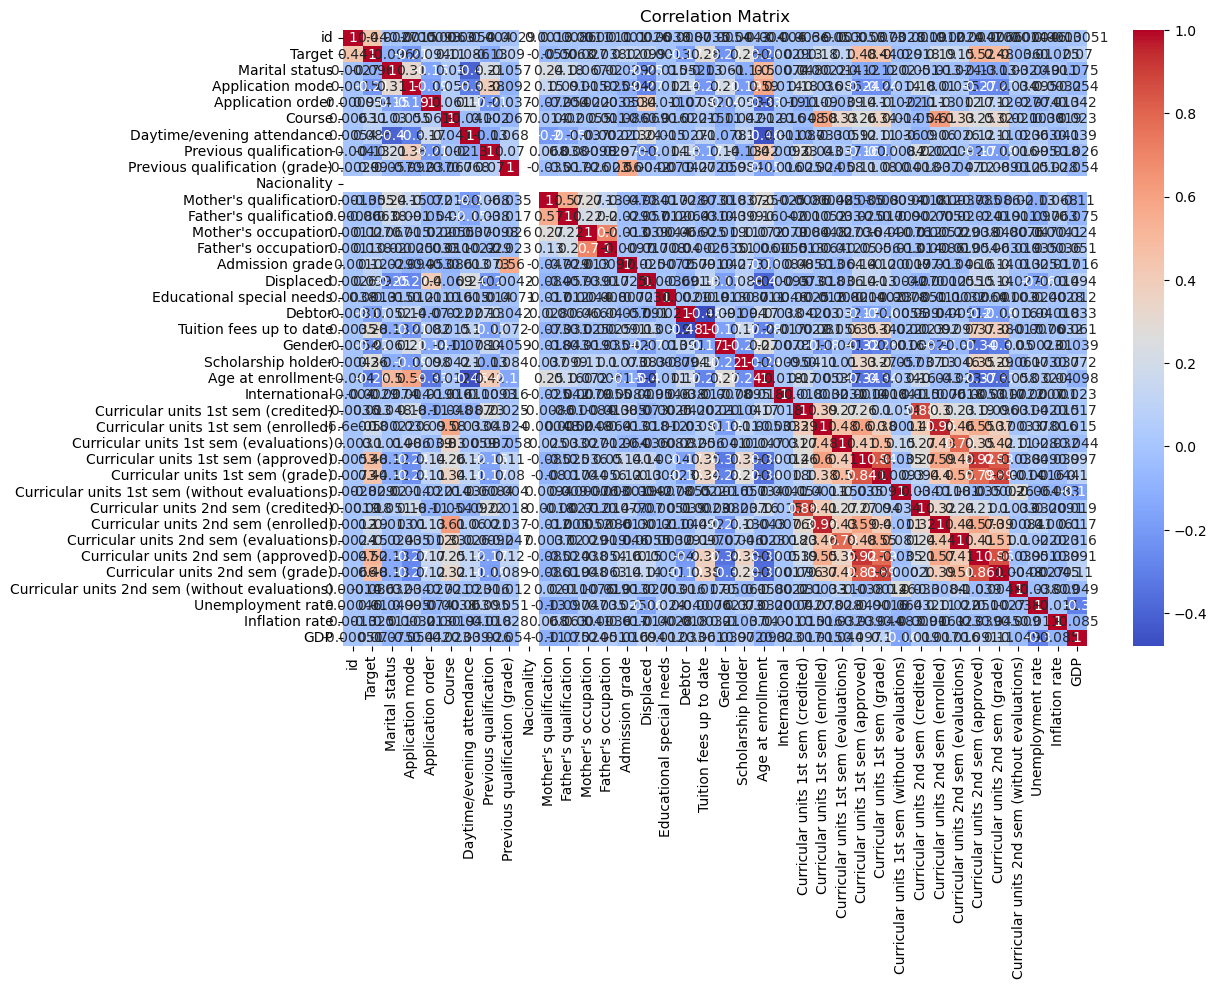

In [205]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Outlier Detection

In [214]:
# Outlier Detection using IQR (after encoding)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data  < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
outliers

id                                                    0
Target                                                0
Marital status                                    10412
Application mode                                      0
Application order                                     4
Course                                             8739
Daytime/evening attendance                        10647
Previous qualification                            15524
Previous qualification (grade)                     2272
Nacionality                                           0
Mother's qualification                                0
Father's qualification                                0
Mother's occupation                                6382
Father's occupation                                8114
Admission grade                                    4301
Displaced                                             0
Educational special needs                           497
Debtor                                          

In [215]:
features_to_calculate_iqr = [['Marital status', 'Application mode',
       'Application order', 'Course', 'Daytime/evening attendance',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']]

# Calculate and print IQR for specified features
for feature in features_to_calculate_iqr:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    print(f'IQR for {feature}: {iqr}')


IQR for ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']: Marital status

In [219]:
for feature in features:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    
    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Replacing outliers with the median of the feature
    median_value = data[feature].median()
    data[feature] = data[feature].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
# Now, outliers in specified features have been replaced with the median

KeyError: 'Age'

In [208]:
data.columns

Index(['id', 'Target', 'Marital status', 'Application mode',
       'Application order', 'Course', 'Daytime/evening attendance',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', 'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curric

## Feature Selection

###  To select all features

In [221]:
# Feature Importance using SelectKBest
X = data.drop('Target', axis=1)  # Drop the target column from the features
y = data['Target']  # Assign the target variable

best_features = SelectKBest(score_func=f_regression, k='all').fit(X, y)
# Fit the SelectKBest model with features (X) and target variable (y)
# k='all' selects all features and returns their scores

feature_names = list(X.columns)  # Get the feature names

# Print feature names and scores in a simpler format
print("\nFeature Scores:")
for feature, score in zip(feature_names, best_features.scores_):
  print(feature, score)  # Print feature name and score directly


Feature Scores:
id 31194.67035554342
Marital status 0.0
Application mode 5764.903172940788
Application order 1146.7355955232306
Course 1467.606156979597
Daytime/evening attendance 940.5287699932013
Previous qualification 2135.264050078384
Previous qualification (grade) 1051.8409530902145
Nacionality 1.4741996998450953e-13
Mother's qualification 386.5240151381326
Father's qualification 5.1297114641552914
Mother's occupation 94.48697678053279
Father's occupation 185.61203445291272
Admission grade 1716.411591639524
Displaced 1269.801950569234
Educational special needs 0.2197287820379968
Debtor 3761.122859396862
Tuition fees up to date 10568.009953121398
Gender 6485.510313371982
Scholarship holder 9151.454656977552
Age at enrollment 3601.0710906352806
International 1.1074845491824616
Curricular units 1st sem (credited) 21.40908589596708
Curricular units 1st sem (enrolled) 4143.915430055925
Curricular units 1st sem (evaluations) 1400.1749839384029
Curricular units 1st sem (approved) 39151.

###  To select top 10 features

In [222]:
# Drop the target column from the features
X = data.drop('Target', axis=1)
y = data['Target']

# Feature Importance using SelectKBest
best_features = SelectKBest(score_func=f_regression, k=10).fit(X, y)

# Get the feature names
feature_names = list(X.columns)

# Print feature names and scores
print("\nFeature Scores:")
for feature, score in zip(feature_names, best_features.scores_):
    print(feature, score)

# Get the indices of the selected features
selected_indices = best_features.get_support(indices=True)

# Get the names of the top 10 features
selected_features = [feature_names[i] for i in selected_indices]


Feature Scores:
id 31194.67035554342
Marital status 0.0
Application mode 5764.903172940788
Application order 1146.7355955232306
Course 1467.606156979597
Daytime/evening attendance 940.5287699932013
Previous qualification 2135.264050078384
Previous qualification (grade) 1051.8409530902145
Nacionality 1.4741996998450953e-13
Mother's qualification 386.5240151381326
Father's qualification 5.1297114641552914
Mother's occupation 94.48697678053279
Father's occupation 185.61203445291272
Admission grade 1716.411591639524
Displaced 1269.801950569234
Educational special needs 0.2197287820379968
Debtor 3761.122859396862
Tuition fees up to date 10568.009953121398
Gender 6485.510313371982
Scholarship holder 9151.454656977552
Age at enrollment 3601.0710906352806
International 1.1074845491824616
Curricular units 1st sem (credited) 21.40908589596708
Curricular units 1st sem (enrolled) 4143.915430055925
Curricular units 1st sem (evaluations) 1400.1749839384029
Curricular units 1st sem (approved) 39151.

In [223]:
selected_features

['id',
 'Application mode',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)']

In [225]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Model Building

In [226]:
# Define features and target variable
X = data[['id', 'Application mode', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
          'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
          'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)',
          'Curricular units 2nd sem (grade)']]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifier models to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f"Results for {name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")


Results for Logistic Regression:
Accuracy: 0.8038892809535011
Confusion Matrix:
 [[ 3257   316  1514]
 [  260   515  2135]
 [  408   369 16732]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.64      0.72      5087
           1       0.43      0.18      0.25      2910
           2       0.82      0.96      0.88     17509

    accuracy                           0.80     25506
   macro avg       0.69      0.59      0.62     25506
weighted avg       0.78      0.80      0.78     25506



Results for Decision Tree:
Accuracy: 0.8401944640476751
Confusion Matrix:
 [[ 3984   683   420]
 [  693  1368   849]
 [  403  1028 16078]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      5087
           1       0.44      0.47      0.46      2910
           2       0.93      0.92      0.92     17509

    accuracy                           0.84     25506
   macro avg 

KeyboardInterrupt: 

##  Parameter 

### test_size

In [ ]:

Definition: Specifies the proportion of the dataset to include in the test split.
Type: Float, int, or None.
Typical Values:
If float, it should be between 0.0 and 1.0 and represents the proportion of the dataset to include in the test split.
If int, it represents the absolute number of test samples.
If None, the value is set to the complement of the train size, and by default, it is 0.25 (25% of the data).

### random_state

In [ ]:

Definition: Controls the shuffling applied to the data before applying the split.
Type: Int, RandomState instance, or None.
Typical Values:
If int, it is the seed used by the random number generator. Using the same seed value will always produce the same split, which is useful for reproducibility.
If RandomState instance, it will use the provided RandomState instance for generating random numbers.
If None, the random number generator is the RandomState instance used by np.random.

##  Hyperparameter tunning

### penalty

In [ ]:
Definition: The type of regularization to apply.
Options:
'l1': L1 regularization (Lasso), which can lead to sparse models where some coefficients become zero.
'l2': L2 regularization (Ridge), which tends to shrink coefficients towards zero but rarely eliminates them completely.
'elasticnet': Combines L1 and L2 penalties.
'none': No regularization.

### C

In [ ]:
Definition: Inverse of regularization strength; smaller values specify stronger regularization.
Options: [0.01, 0.1, 1, 10, 100]
0.01, 0.1: Strong regularization.
1: Moderate regularization.
10, 100: Weak regularization.

### solver: Alternative to Gradient descent

1) Definition: The solver parameter determines which optimization algorithm to use to find the coefficients (weights) that minimize this loss function.

2) Solver is used when we need to iport the Regularization echniques like L1 and L2 
2) Options:

1) 'lbfgs': Limited-memory Broyden–Fletcher–Goldfarb–Shanno, a quasi-Newton method.

2) 'liblinear': A library for large linear classification.

3) 'saga': A variant of stochastic average gradient descent.

## When to use Gradient Descent

When to Use Normal Gradient Descent (Batch, Minibatch, Stochastic):
Small to Medium-Sized Datasets:

Batch Gradient Descent: Suitable when the entire training dataset can fit into memory. It computes gradients using the entire training set and updates weights once per epoch.
Iterative Updates:

Minibatch Gradient Descent: Ideal when dealing with large datasets. It updates weights based on a small random subset (minibatch) of the training data, balancing efficiency and convergence speed.
Stochastic Updates:

Stochastic Gradient Descent (SGD): Useful for very large datasets or online learning scenarios. It updates weights using gradients computed from a single training example, making it computationally efficient but with high variance in parameter updates.
Custom Optimization Needs:

If you have specific needs for custom optimization routines or want fine-grained control over the optimization process, implementing gradient descent variants allows flexibility in adjusting learning rates, momentum, and other parameters.

When to Use Solvers (like lbfgs, liblinear, saga):
Large Datasets:

Efficiency: Solvers are preferred for large-scale datasets where computing gradients for the entire dataset (as in batch GD) is impractical due to memory constraints or computational expense.
Sparse Data:

Sparse Matrices: Solvers like liblinear and saga are optimized to handle sparse matrices efficiently, making them suitable for problems with high-dimensional sparse data.
Regularization Needs:

L1 and L2 Regularization: Solvers such as saga support both L1 (Lasso) and L2 (Ridge) regularization, making them suitable for problems requiring regularization to prevent overfitting.
Convergence Speed:

Faster Convergence: Solvers often converge faster and more reliably than basic gradient descent variants, especially for linear models where the loss function is convex.
List of Linear Models with Solvers:
Logistic Regression: lbfgs, liblinear, saga
Linear Support Vector Machines (Linear SVM): liblinear, saga
Linear Ridge Regression: auto, saga
Linear Elastic Net Regression: saga

Conclusion:
Gradient Descent: Useful when you need control over optimization process, dealing with small to medium datasets, or implementing custom learning schemes.
Solvers: Preferred for large-scale datasets, sparse matrices, and when regularization and faster convergence are priorities. They offer efficient solutions tailored to linear model characteristics, enhancing performance and scalability in real-world applications.

### max_iter:

Definition: 
1) stands for maximum iterations. It specifies the maximum number of iterations (or epochs) that the optimization algorithm (solver) should run to minimize the loss function and find the optimal coefficients (weights).
2) Maximum number of iterations taken for the solvers to converge.

3) Options:[100, 200, 300

### estimator:


In [ ]:
Decides the the model to use. In this case, it's the logistic regression model.

### n_estimators

the n_estimators parameter specifies the number of individual models (often decision trees) to be used in the ensemble in ensemble methods like random forests, gradient boosting, and bagging,

### base_estimator

base_estimator refers to the individual model or algorithm that is used as the basic building block within an ensemble method. Ensemble methods combine multiple base estimators to improve predictive performance compared to using a single model.

### param_grid:


In [ ]:
Dictionary where keys are parameter names (strings) and values are lists of parameter settings to try.

###  CV

In [ ]:
Number of cross-validation folds. In this case, 5 means 5-fold cross-validation : 

Cross-validation is a statistical method used in machine learning to assess the performance and generalizability of a model. It involves partitioning the data into multiple subsets and evaluating the model's performance on different subsets to ensure it works well on unseen data. Here’s a more detailed explanation:

## Key Concepts
Training Set: The portion of data used to train the model.
Validation Set: The portion of data used to evaluate the model during training and tune the model's parameters.
Test Set: The portion of data used to assess the final performance of the model after training is complete.

### Types of Cross-Validation

### K-Fold Cross-Validation:

The data set is divided into 𝑘
k equal-sized folds.
The model is trained 𝑘
k times, each time using  𝑘
−
1
k−1 folds for training and the remaining one fold for validation.
The validation results are averaged to produce a single performance metric.
Example: In 5-fold cross-validation, the data is split into 5 folds. The model is trained on 4 folds and validated on the remaining fold. This process is repeated 5 times, with each fold used exactly once as the validation set.

### Leave-One-Out Cross-Validation (LOOCV):

A special case of k-fold cross-validation where 
𝑘
k equals the number of data points in the dataset.
Each instance is used once as a validation set while the remaining instances form the training set.
Provides a thorough but computationally expensive evaluation.

### Stratified K-Fold Cross-Validation:

A variant of k-fold cross-validation where each fold maintains the same class proportion as the entire dataset.
Useful for imbalanced datasets to ensure each fold is representative of the overall class distribution.

### Holdout Method:

The data is split into a single training set and a single test set, usually with a fixed ratio (e.g., 70% training and 30% testing).
Simpler and less computationally intensive but can be less reliable for small datasets.
Benefits of Cross-Validation
Better Generalization: Helps in assessing how well the model generalizes to an independent dataset.
Efficient Use of Data: Especially important for small datasets, as it maximizes the use of data for both training and validation.
Bias-Variance Tradeoff: Provides insight into the bias-variance tradeoff by showing how the model performs on different subsets of data.
Implementation Steps
Split the Data: Divide the dataset into k subsets (folds).
Train and Validate: For each fold, train the model on 
𝑘
−
1
k−1 folds and validate on the remaining fold.
Evaluate: Calculate and record the performance metric (e.g., accuracy, F1 score) for each fold.
Aggregate Results: Compute the average performance metric across all folds to get an overall performance estimate.

## Randdom_search_cv

1) Sampling : Random Search CV samples hyperparameter values randomly from predefined distributions.
2) It does not exhaustively evaluate all possible combinations of hyperparameters.
3) Useful when the parameter space is large or not well-defined, balancing exploration and exploitation
4) Suitable for large or complex search spaces, more computationally efficient
5) May find better hyperparameter combinations due to broader exploration
6) Computational cost is typically less than grid search, efficient for large search spaces
7)  search atrategy is Samples a subset of combinations randomly
8) 



### n_jobs:



Number of jobs to run in parallel. -1 means using all processors.

n_jobs=-1:This means that the different combinations of hyperparameters (like max_iter, penalty, C, solver, etc.) specified in the grid search will be evaluated in parallel, speeding up the hyperparameter tuning process.

Use all available CPU cores.
n_jobs=None or n_jobs=1: Use a single core (no parallelism).

n_jobs=N (where N is a positive integer): Use exactly N cores.

defines the number of CPU cores to be used for computations

 This parameter is used to parallelize tasks to improve performance and reduce computation time, especially for operations 
 that can be executed concurrently, such as training multiple models, performing cross-validation, or running grid searches.
 

### scoring:

In [ ]:
The scoring metric is the method  to evaluate the models. 'accuracy' means using accuracy as the metric.

## Bias-Variance Trade off

### Definition:
The trade-off between bias and variance in machine learning means that as you decrease bias, variance typically increases, and vice versa
Understanding the Trade-Off
 
## Bias:

High bias means the model is too simplistic and makes strong assumptions about the data, leading to systematic errors and underfitting.
Low bias means the model is more flexible and can capture more of the underlying data patterns, reducing systematic errors.
Variance:

High variance means the model is highly sensitive to the specific training data, capturing noise along with the underlying patterns, leading to overfitting.
Low variance means the model is less sensitive to the training data, capturing the general patterns but possibly missing finer details.
### Why the Trade-Off Happens
### Simple Models:
When you use a simple model (e.g., a linear model for nonlinear data), the model has high bias because it cannot capture the complexity of the data. However, it has low variance because it is not sensitive to small fluctuations in the training data.

### Complex Models: 
When you use a complex model (e.g., a high-degree polynomial), the model has low bias because it can capture the complexity of the data. However, it has high variance because it becomes sensitive to noise and small variations in the training data.

### Model Complexity
Simple Models (High Bias): Simple models (e.g., linear regression) make strong assumptions about the data. They have limited flexibility to capture the underlying patterns, leading to systematic errors (bias). These models might underfit the data, meaning they cannot represent the true relationship between the input features and the target variable.

Complex Models (High Variance): Complex models (e.g., deep neural networks, high-degree polynomials) have high flexibility and can capture intricate patterns in the training data. However, they may also learn noise and peculiarities specific to the training data, leading to overfitting. This sensitivity to training data variations results in high variance when the model is applied to new data.
   
### Managing the Trade-Off
To achieve the best performance, you want to find a balance between bias and variance. This is done by:

### Model Selection: 
Choosing a model with the right complexity for your data.
### Regularization:
Adding penalties for complexity (e.g., L1 and L2 regularization) to prevent overfitting.
### Cross-Validation: 
Using techniques like k-fold cross-validation to assess model performance and avoid overfitting.
### Ensemble Methods:
Combining multiple models to reduce variance (e.g., bagging) or to reduce both bias and variance (e.g., boosting).

## Grid_search_cv:  

Method:  Number of combinations of  parameters  are 180
1) Data train,Test splits

2) Model importing
        
3) Initialize Grid searchcv , penalty, c,solver,max_iter
        
4) Fit the Grid search to x_train and y_train
        
5) get_best_param using grid_search.best_params_
        
6) train model based on this  best parameters i.e param
        
7) Make predictions

##  Logistic Regression

In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your data
# data = pd.read_csv('path_to_your_data.csv')

# Define features and target variable
X = data[['id', 'Application mode', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
          'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
          'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)',
          'Curricular units 2nd sem (grade)']]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Results:
Accuracy: 0.8038892809535011
Confusion Matrix:
 [[ 3257   316  1514]
 [  260   515  2135]
 [  408   369 16732]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.64      0.72      5087
           1       0.43      0.18      0.25      2910
           2       0.82      0.96      0.88     17509

    accuracy                           0.80     25506
   macro avg       0.69      0.59      0.62     25506
weighted avg       0.78      0.80      0.78     25506



In [228]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Hyperparameter Tunning

# Load your data
# data = pd.read_csv('path_to_your_data.csv')

# Define features and target variable
X = data[['id', 'Application mode', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
          'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
          'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)',
          'Curricular units 2nd sem (grade)']]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],  ## Extend of Reguralization
    'solver': ['lbfgs', 'liblinear', 'saga'], 
    'max_iter': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Results:
Best Parameters: {'C': 0.01, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8312553908884184
Confusion Matrix:
 [[ 3787   250  1050]
 [  500   582  1828]
 [  299   377 16833]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78      5087
           1       0.48      0.20      0.28      2910
           2       0.85      0.96      0.90     17509

    accuracy                           0.83     25506
   macro avg       0.72      0.64      0.66     25506
weighted avg       0.81      0.83      0.81     25506



##  Decision Tree 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your data
# data = pd.read_csv('path_to_your_data.csv')

# Define features and target variable
X = data[['id', 'Application mode', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
          'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
          'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)',
          'Curricular units 2nd sem (grade)']]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your data
# data = pd.read_csv('path_to_your_data.csv')

# Define features and target variable
X = data[['id', 'Application mode', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
          'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
          'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)',
          'Curricular units 2nd sem (grade)']]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Decision Tree Results:")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


##  Random Forest Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your data
# data = pd.read_csv('path_to_your_data.csv')

# Define features and  target variable
X = data[['id', 'Application mode', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
          'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
          'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)',
          'Curricular units 2nd sem (grade)']]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your data
# data = pd.read_csv('path_to_your_data.csv')

# Define features and target variable
X = data[['id', 'Application mode', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
          'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
          'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)',
          'Curricular units 2nd sem (grade)']]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


##  Support vecctor cassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your data
# data = pd.read_csv('path_to_your_data.csv')

# Define features and target variable
X = data[['id', 'Application mode', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
          'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
          'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)',
          'Curricular units 2nd sem (grade)']]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = SVC()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Support Vector Machine Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your data
# data = pd.read_csv('path_to_your_data.csv')

# Define features and target variable
X = data[['id', 'Application mode', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
          'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
          'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)',
          'Curricular units 2nd sem (grade)']]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine Results:")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


##  Linear ,  Ridge and Lasso Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

#  Linear Regression using Gridsearchcv
linear_model = LinearRegression()
param_grid = {'fit_intercept': [True, False],'normalize': [True, False] } 
# Whether to calculate the intercept for this model,# This parameter is deprecated, should be avoided in the latest version
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)



# L1 Regression (Lasso)
lasso_model = Lasso(alpha=0.1, max_iter=10000)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("L1 Regression (Lasso) MSE:", mse_lasso)

# L1 Regression (Lasso) using Gridsearchcv
param_grid_l1 = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_l1 = GridSearchCV(Lasso(max_iter=10000), param_grid_l1, cv=5, scoring='neg_mean_squared_error')
grid_search_l1.fit(X_train, y_train)
best_l1_model = grid_search_l1.best_estimator_
y_pred_l1 = best_l1_model.predict(X_test)
mse_l1 = mean_squared_error(y_test, y_pred_l1)
print("L1 Regression (Lasso) Best Alpha:", grid_search_l1.best_params_['alpha'])
print("L1 Regression (Lasso) MSE:", mse_l1)


# L2 Regression (Ridge)
ridge_model = Ridge(alpha=0.1, max_iter=10000)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("L2 Regression (Ridge) MSE:", mse_ridge)

# L2 Regression (Ridge) using Gridsearchcv 
param_grid_l2 = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_l2 = GridSearchCV(Ridge(max_iter=10000), param_grid_l2, cv=5, scoring='neg_mean_squared_error')
grid_search_l2.fit(X_train, y_train)
best_l2_model = grid_search_l2.best_estimator_
y_pred_l2 = best_l2_model.predict(X_test)
mse_l2 = mean_squared_error(y_test, y_pred_l2)
print("L2 Regression (Ridge) Best Alpha:", grid_search_l2.best_params_['alpha'])
print("L2 Regression (Ridge) MSE:", mse_l2)
